# Lesson 1: Exercise 1

## Creating Data and Backtesting a Trading Strategy

---

## Overview

Welcome to this Excercise. We are now going to put our skills to the test and create a dataset and prepare our first backtests. Proper data preparation is essential to conducting succesful backtest, and we want to make sure that we build a solid foundation and develop proper techniques to ensure that we can build our datasets easily at scale and develop proper data wrangling and preparation approaches. In particular, we are going to cover the  essential steps that are necessary to succesfully build trading  models beginning from creating datasets from publicly available stock price data to conducting exploratory data analysis to finally building and testing models. We are then quickly shifts gears and illustrate a few advanced investment ideas that can be used for further analysis.


In [1]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../../'))
# Add the path to sys.path
sys.path.append(func_lib_path)
# Now you can import func_lib
import func_lib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
#  Create a variable named 'historical_prices' to store historical price data between the dates'2005-01-01' and '2015-01-01'. Use the function 'createHistPrices()' from 'func_lib' to generate or retrieve the historical prices.
historical_prices = func_lib.create_hist_prices(start_date = '2005-01-01', end_date = '2015-01-01')
# Create a list named 'list_of_momentums' and add 1 to the list
list_of_momentums = [1]
# Compute the total returns using the historical prices and the list of momentums. Use the 'computingReturns()' function from 'func_lib'. Pass 'historical_prices' and 'list_of_momentums' as arguments to 'func_lib.computingReturns()'.
# - Store the result in a variable named 'total_returns'.
total_returns     = func_lib.compute_returns(historical_prices, list_of_momentums)
# Use the 'dropna()' method on the 'total_returns' DataFrame.
total_returns.dropna(inplace=True)

[*********************100%***********************]  500 of 501 completed

32 Failed downloads:
['GEHC', 'DOW', 'GEV', 'OTIS', 'VST', 'SW', 'FOX', 'MRNA', 'FTV', 'FOXA', 'VICI', 'PLTR', 'IR', 'DELL', 'HPE', 'INVH', 'DAY', 'PYPL', 'ABNB', 'VLTO', 'QRVO', 'LW', 'GDDY', 'SOLV', 'CEG', 'CRWD', 'CTVA', 'CARR', 'UBER', 'KHC', 'KVUE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2005-01-01 -> 2015-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1104555600, endDate = 1420088400")')
['HWM']: ChunkedEncodingError(ProtocolError("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read)))


In [3]:
# Print the first 5 lines of total returns


F_1_d_returns  1_d_returns
Ticker Date                                                 
A      2005-01-04 00:00:00+00:00      -0.000430    -0.026382
       2005-01-05 00:00:00+00:00      -0.021945    -0.000430
       2005-01-06 00:00:00+00:00      -0.000880    -0.021945
       2005-01-07 00:00:00+00:00      -0.004844    -0.000880
       2005-01-10 00:00:00+00:00      -0.017257    -0.004844

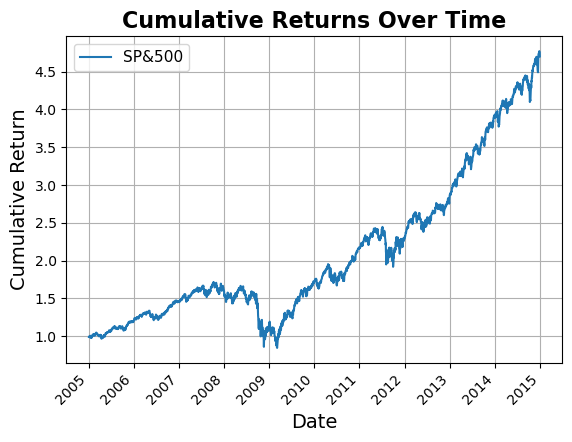

The CAGR is: 16.84%
Sharpe Ratio of Strategy: 0.8


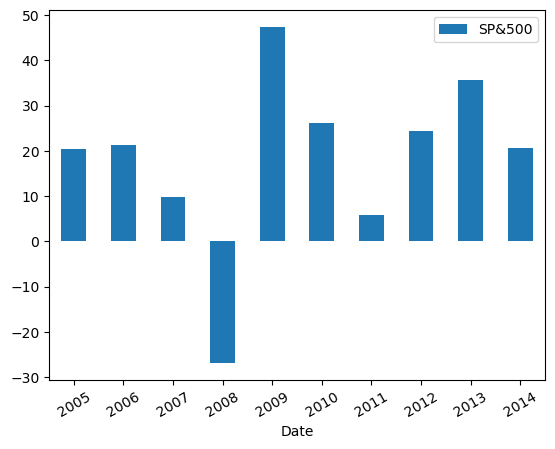

In [4]:
# Compute cumulative and calendar returns from the total returns data. 
# Use the 'compute_BM_Perf()' function from 'func_lib' to perform this calculation. 
# Pass 'total_returns' as an argument to 'func_lib.compute_BM_Perf()'.
# - The function returns two outputs: 'cum_returns' for cumulative returns and 'calendar_returns' for calendar returns.
# - Assign the outputs to the variables 'cum_returns' and 'calendar_returns' respectively.


In [5]:
# Calculate the Relative Strength Index (RSI) for each 'Ticker' and add it to the 'total_returns' DataFrame.First, group the 'total_returns' DataFrame by the 'Ticker' column.
# For each group, select the '1_d_returns' column and apply a transformation using the 'calculate_rsi' function from 'func_lib'.
# - Assign the result to a new column named 'RSI' in the 'total_returns' DataFrame.


In [6]:
# Print out the first 5 rows of the total_returns dataframe


F_1_d_returns  1_d_returns  RSI
Ticker Date                                                      
A      2005-01-04 00:00:00+00:00      -0.000430    -0.026382  NaN
       2005-01-05 00:00:00+00:00      -0.021945    -0.000430  NaN
       2005-01-06 00:00:00+00:00      -0.000880    -0.021945  NaN
       2005-01-07 00:00:00+00:00      -0.004844    -0.000880  NaN
       2005-01-10 00:00:00+00:00      -0.017257    -0.004844  NaN

In [7]:
#  Define a trading strategy function based on the RSI (Relative Strength Index). Create a function named 'trading_strategy' that accepts one parameter: 'rsi'.
# Inside the function, use an if-else statement to implement the trading logic:
#     - If 'rsi' is less than 65, return 1 (indicating a decision to go long).
#     - Otherwise, return 0 (indicating no position or a different strategy).
# - This function will be used later to determine trading actions based on RSI values.



In [8]:
# Create a variable named 'model_name' and set it to the string "RSI".


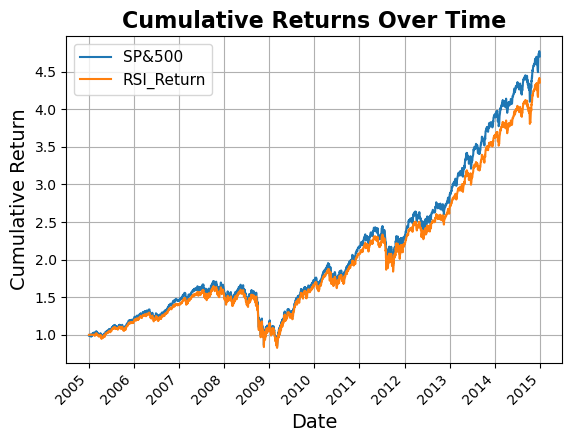

The CAGR is: 15.89%
Sharpe Ratio of Strategy: 0.78


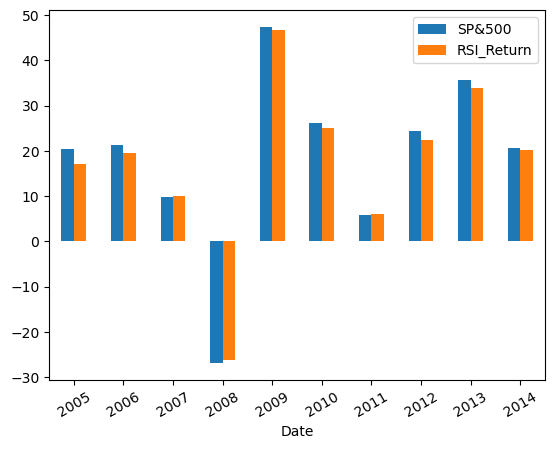

In [15]:
# Compute cumulative and calendar returns for the given trading strategy.
# Use the 'compute_strat_perf()' function from 'func_lib' to perform this calculation.
# Pass 'total_returns', 'cum_returns', 'calendar_returns', 'trading_strategy', and 'model_name' as arguments.
# - The function returns updated 'cum_returns' and 'calendar_returns' based on the strategy's performance.


In [16]:
# Create the true values (y_test) indicating whether future 1-day returns (F_1_d_returns) are larger or smaller than 0.
# Use the 'np.where()' function to evaluate the 'F_1_d_returns' column in the 'total_returns' DataFrame.
# Store the result in a new column called 'y_test' in the 'total_returns' DataFrame.

# Copy the values from the 'Position' column of 'total_returns' to a new column named 'y_pred'.



In [17]:
# Convert the 'y_test' column from the 'total_returns' DataFrame to a list using the 'tolist()' method.
# Store the result in a variable named 'y_test'.
# Similarly, convert the 'y_pred' column to a list and store it in a variable named 'y_pred'.



In [18]:
# Calculate the accuracy, precision, and recall of the trading strategy.
# - Use the 'accuracy_score()' function to calculate the accuracy of the predictions.
#     - Pass the actual values (y_test) and the predicted values (y_pred) as arguments.
#     - Store the result in a variable named 'accuracy'.
# - Use the 'precision_score()' function to calculate the precision of the predictions.
#     - Similarly, pass 'y_test' and 'y_pred' as arguments.
#     - Store the result in a variable named 'precision'.
# - Use the 'recall_score()' function to calculate the recall of the predictions.
#     - Again, pass 'y_test' and 'y_pred' as arguments.
#     - Store the result in a variable named 'recall'.


In [19]:
# Create a DataFrame named 'metrics_df' using the 'pd.DataFrame()' function.
# Define a dictionary with two keys: 'Metric' and 'Value'.
#     - The 'Metric' key should have a list of strings: ['Accuracy', 'Precision', 'Recall'].
#     - The 'Value' key should have a list of the calculated metrics: [accuracy, precision, recall].


In [20]:
# Display the 'metrics_df' DataFrame to see the performance of the trading strategy.


,Metric,Value
0,Accuracy,0.511735
1,Precision,0.512622
2,Recall,0.936336
